# Metodo della Massima Verosimiglianza applicato ai dati di Centa San Nicolò

Matteo Franzoi - 2019-03-23

---

Primo passo è importare le librerie

In [3]:
import os
from pandas import *
import pandas as pd
from numpy import *
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import math
from datetime import datetime
from scipy.stats import genextreme, gumbel_r
from numpy import linspace
from statsmodels.distributions.empirical_distribution import ECDF

In [4]:
os.getcwd()

'/media/data/jupyter/esercitazione'

In [7]:
os.listdir()

['.ipynb_checkpoints',
 'abs_m',
 'massimePrecipitazioniCenta.csv',
 'mleCenta.ipynb',
 'momentiCenta.ipynb']

e importare il ffile _csv_ dei dati

In [8]:
pd.set_option('display.max_rows', 20)
data = read_csv('massimePrecipitazioniCenta.csv')
map(datetime, data['anno'])
data = data.set_index('anno')
data

,1h,3h,6h,12h,24h
anno,,,,,
1934,22.6,42.0,56.6,58.8,85.0
1935,17.8,32.6,54.2,63.6,88.0
1936,15.8,28.0,41.4,72.0,85.2
1937,27.8,35.6,38.2,58.4,62.6
1938,15.0,21.4,32.0,56.0,83.0
1939,29.4,36.2,61.0,115.2,117.8
1940,28.8,67.0,94.0,119.0,135.2
1941,14.2,21.0,25.6,44.0,51.0
1942,27.0,42.0,66.2,82.6,85.6


Il metodo della massima verosimiglianza calcola i valori di **a, b** che massimizzano la probabilità congiunta di ottenere una serie di dati __$\{h_1,\dots,h_n\}$__.  
Viene calcolata la coppia di valori *a* e _b_ per ogni durata

Per 1h

In [24]:
samp = data['1h'].dropna()
param1h = gumbel_r.fit(samp)
param1h

(20.07773753202705, 6.560460617974382)

Per 3h

In [25]:
samp = data['3h'].dropna()
param3h = gumbel_r.fit(samp)
param3h

(30.042461167355263, 9.253391584430704)

Per 6h

In [26]:
samp = data['6h'].dropna()
param6h = gumbel_r.fit(samp)
param6h

(41.084931130740436, 12.291069231710425)

Per 12h

In [27]:
samp = data['12h'].dropna()
param12h = gumbel_r.fit(samp)
param12h

(57.40209293321375, 19.296025817381924)

E infine per 24h

In [29]:
samp = data['24h'].dropna()
param24h = gumbel_r.fit(samp)
param24h

(76.44079169216053, 24.643280756008394)

È utile creare un DataFrame contente tutti i valori di _a_ e *b* e salvarlo in un file

In [30]:
abs_mle = pd.DataFrame([
    param1h, 
    param3h,
    param6h,
    param12h,
    param24h],
    columns = ['a', 'b'],
    index = ['1h', '3h', '6h', '12h', '24h']
).T
abs_mle

,1h,3h,6h,12h,24h
a,20.077738,30.042461,41.084931,57.402093,76.440792
b,6.560461,9.253392,12.291069,19.296026,24.643281


In [31]:
abs_mle.to_pickle('abs_mle')

In [32]:
os.listdir()

['.ipynb_checkpoints',
 'abs_m',
 'abs_mle',
 'massimePrecipitazioniCenta.csv',
 'mleCenta.ipynb',
 'momentiCenta.ipynb']

Una volta salvati i dati, si calcolano i valori minimo e il massimo di precipitazione

In [33]:
data.min()

1h     12.6
3h     20.0
6h     24.0
12h    24.2
24h    43.6
dtype: float64

Il minimo è il valore corrispondente alla durata di 1h

In [34]:
data.min()['1h']

12.6

In [35]:
data.max()

1h      55.8
3h      79.0
6h     103.8
12h    152.2
24h    192.0
dtype: float64

mentre il massimo corrisponde alle 24h

In [36]:
data.max()['24h']

192.0

Si crea allora un vettore lineare di 100 valori che vanno dal minimo al massimo

In [37]:
t_rain = np.linspace(data.min()['1h'], data.max()['24h'], 100)

Ricordando che la funzione di Gumbel è definita come
$$
\Large{e^{-e^{-\frac{h-a}{b}}}}
$$
si può scrivere

In [38]:
def gumbel(x, abs_d, col):
    return np.exp(-np.exp(-(x - abs_d[col]['a'])/abs_d[col]['b']))

Il DataFrame contenente tutti i valori ricavati dalla funzione di Gumbel appena scritta è

In [39]:
gb = pd.DataFrame([
    gumbel(t_rain, abs_mle, '1h'),
    gumbel(t_rain, abs_mle, '3h'),
    gumbel(t_rain, abs_mle, '6h'),
    gumbel(t_rain, abs_mle, '12h'),
    gumbel(t_rain, abs_mle, '24h')
]).T

gb.index = t_rain
gb.columns = ['1h', '3h', '6h', '12h', '24h']

gb

,1h,3h,6h,12h,24h
12.600000,0.043884,0.001379,0.000039,0.000037,0.000002
14.412121,0.093323,0.004450,0.000157,0.000093,0.000004
16.224242,0.165419,0.011657,0.000522,0.000214,0.000010
18.036364,0.255378,0.025731,0.001470,0.000457,0.000023
19.848485,0.355027,0.049335,0.003595,0.000910,0.000048
21.660606,0.455834,0.084252,0.007776,0.001705,0.000098
23.472727,0.551004,0.130817,0.015132,0.003019,0.000188
25.284848,0.636250,0.187831,0.026878,0.005078,0.000345
27.096970,0.709615,0.252888,0.044126,0.008154,0.000607
28.909091,0.770866,0.322937,0.067683,0.012549,0.001027


E quindi plottare i dati

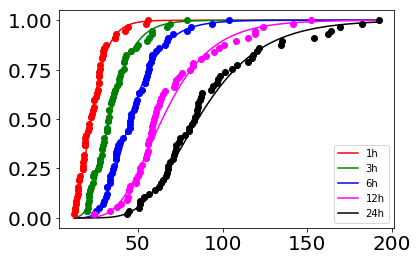

In [48]:
plt.rc('xtick', labelsize = 20)
plt.rc('ytick', labelsize = 20)

#----------------------------plot--------------------------------------

ax = gb.plot(color = ['red', 'green', 'blue', 'magenta', 'black'])

#------------------------------1h--------------------------------------
data1h = data['1h'].dropna()
ecdf1h = ECDF(data1h)
ax.plot(data1h, ecdf1h(data1h), 'o', c = 'red')

#------------------------------3h--------------------------------------
data3h = data['3h'].dropna()
ecdf3h = ECDF(data3h)
ax.plot(data3h, ecdf3h(data3h), 'o', c = 'green')

#------------------------------6h--------------------------------------
data6h = data['6h'].dropna()
ecdf6h = ECDF(data6h)
ax.plot(data6h, ecdf6h(data6h), 'o', c = 'blue')

#------------------------------12h--------------------------------------
data12h = data['12h'].dropna()
ecdf12h = ECDF(data12h)
ax.plot(data12h, ecdf12h(data12h), 'o', c = 'magenta')

#------------------------------24h--------------------------------------
data24h = data['24h'].dropna()
ecdf24h = ECDF(data24h)
ax.plot(data24h, ecdf24h(data24h), 'o', c = 'black')

#-----------------------------------------------------------------------
plt.show()